In [270]:
import numpy as np
import matplotlib.pyplot as plt

In [271]:
input = []
with open("d6_input") as f:
    for line in f:
        input.append(list(line[:-1]))
input = np.array(input)
obstacles = input == "#"
loc = np.where(input == "^")
loc = np.array((loc[0][0], loc[1][0]))
visited = np.zeros(input.shape)
turn_locs = np.zeros((input.shape[0], input.shape[0], input.shape[0], input.shape[0]))
new_obs = np.zeros(input.shape)

In [272]:
# dir = np.array([-1, 0])
rot = np.array([[0, -1], [1, 0]])

In [273]:
def is_loop(visited, turn_locs, loc, dir):
    # new_visited = np.copy(visited)
    new_turns = np.copy(turn_locs)
    while(True):
        # new_visited[loc[0], loc[1]] = 1
        next_loc = loc + dir
        if not 0 <= next_loc[0] < input.shape[0]:
            return False
        if not 0 <= next_loc[1] < input.shape[1]:
            return False
        if obstacles[next_loc[0], next_loc[1]]:
            if new_turns[loc[0], loc[1], next_loc[0], next_loc[1]]:
                return True
            new_turns[loc[0], loc[1], next_loc[0], next_loc[1]] = 1
            dir = np.matmul(dir, rot)
        else:
            loc = next_loc
        

In [274]:

next_dir = np.matmul(dir, rot)

while(True):
    if np.sum(visited) % 10 == 0:
        print(np.sum(visited))
    visited[loc[0], loc[1]] = 1
    next_loc = loc + dir
    if not 0 <= next_loc[0] < input.shape[0]:
        break
    if not 0 <= next_loc[1] < input.shape[1]:
        break
    if obstacles[next_loc[0], next_loc[1]]:
        turn_locs[loc[0], loc[1], next_loc[0], next_loc[1]] = 1
        dir = np.matmul(dir, rot)
    else:
        if is_loop(visited, turn_locs, loc, np.matmul(dir, rot)):
            new_obs[next_loc[0], next_loc[1]] = 1
        loc = next_loc
        
print(int(np.sum(visited)))
print(int(np.sum(np.logical_or(obstacles, new_obs)) - np.sum(obstacles)))
print(int(np.sum(new_obs)))


0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
300.0
310.0
320.0
330.0
340.0
350.0
360.0
370.0
380.0
390.0
400.0
410.0
420.0
430.0
440.0
450.0
460.0
470.0
480.0
490.0
500.0
510.0
520.0
530.0
540.0
550.0
560.0
570.0
580.0
590.0
600.0
610.0
620.0
630.0
640.0
650.0
660.0
670.0
680.0
690.0
700.0
700.0
710.0
720.0
730.0
740.0
750.0
760.0
760.0
770.0
780.0
790.0
800.0
810.0
820.0
830.0
840.0
850.0
860.0
870.0
880.0
890.0
900.0
910.0
920.0
930.0
940.0
950.0
960.0
970.0
980.0
990.0
1000.0
1010.0
1020.0
1030.0
1040.0
1050.0
1060.0
1070.0
1080.0
1090.0
1100.0
1110.0
1120.0
1130.0
1140.0
1150.0
1160.0
1170.0
1180.0
1190.0
1200.0
1210.0
1220.0
1230.0
1240.0
1250.0
1260.0
1270.0
1280.0
1290.0
1300.0
1310.0
1320.0
1330.0
1340.0
1350.0
1360.0
1370.0
1370.0
1380.0
1390.0
1400.0
1410.0
1420.0
1430.0
1440.0
1450.0
1460.0
1470.0
1480.0
1490.0
1500.0
1510.0
1510.0
1520.0
1530.0
1540.0


In [ ]:

next_dir = np.matmul(dir, rot)
turn_count = 0
prev_count = 0
while(True):
    visited[loc[0], loc[1]] = 1
    next_loc = loc + dir
    
    if not 0 <= next_loc[0] < input.shape[0]:
        break
    if not 0 <= next_loc[1] < input.shape[1]:
        break
    # print(loc)
    if obstacles[next_loc[0], next_loc[1]]:
        dir = next_dir
        next_dir = np.matmul(dir, rot)
        turn_locs.append(loc)
        turn_count += 1
        if turn_count > 1: print(turn_count)
    else:
        if len(turn_locs) > 2:
            deltas = (np.array(turn_locs) - loc)
            if np.any(np.dot(deltas, next_dir) == np.sqrt(np.sum(deltas**2, axis=1))):
                # print(np.array(loc) != turn_locs[-1])
                if np.any(np.array(loc) != turn_locs[-1]) or prev_count > 1:
                    new_obs[next_loc[0], next_loc[1]] = 1
        prev_count = turn_count
        turn_count = 0
        loc = next_loc
        
print(int(np.sum(visited)))
print(int(np.sum(np.logical_or(obstacles, new_obs)) - np.sum(obstacles)))
print(int(np.sum(new_obs)))


5095
1210
1210


In [234]:
a = np.where(turn_locs == 1)
turn_locs_l = np.array([[a[0][i], a[1][i]] for i in range(len(a[0]))])

/var/folders/kc/659zszp14kl0mljp1psj9jd40000gn/T/ipykernel_82046/854560063.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  a = np.where(turn_locs == 1)


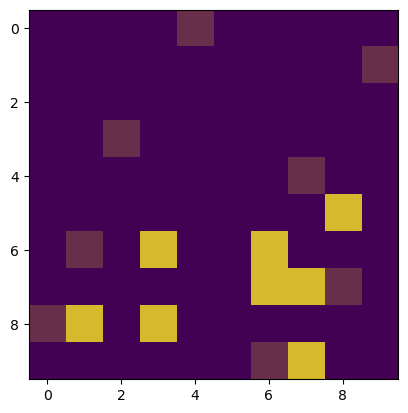

In [250]:
plt.imshow(new_obs)
plt.imshow(obstacles, alpha =0.2)

In [130]:
turn_locs_l

array([[1, 4],
       [1, 8],
       [4, 2],
       [4, 6],
       [6, 2],
       [6, 8],
       [7, 1],
       [7, 7],
       [8, 1],
       [8, 6]])

In [129]:
for i in range(len(turn_locs_l)):
    share_x = np.extract(turn_locs_l[i:, 0] == turn_locs_l[i, 0], turn_locs_l[i:] )
    print(share_x)
    

[1 4]
[1]
[4 2]
[4]
[6 2]
[6]
[7 1]
[7]
[8 1]
[8]


In [128]:
turn_locs_l[:, 0]

array([1, 1, 4, 4, 6, 6, 7, 7, 8, 8])